In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt

In [21]:
#---------------------------- High dimensional Gaussian Data --------------------------------------
dataset = pd.read_csv('dim032.csv', header = None)
dataset = dataset.values

In [30]:
#------------------------------- Water Treatment Data ----------------------------------------------

dataset = pd.read_csv('water-treatment.csv', header = None)
dataset = dataset.replace('?', np.NaN)   #replacing missing values ? with NaN
dataset = dataset.values
dataset = pd.DataFrame(data = dataset)
dataset.to_csv('Trial1.csv', index = None)
dataset = pd.read_csv('Trial1.csv')
dataset = dataset.drop(['0'], axis = 1)   #removing first column from the dataset
dataset.values
imputer = Imputer()
dataset = imputer.fit_transform(dataset)   #replacing NaN with the average value of that column
dataset = pd.DataFrame(data = dataset)
dataset.to_csv('FinalData.csv', index = None)
dataset = pd.read_csv('FinalData.csv')
dataset = dataset.values


C:\Users\Bikram Kumar De\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
#--------------------------------------- Initializing Lambda ----------------------------------------
X, Y = dataset.shape
Lambda_def = 0
for i in range(0, X):
    for j in range(0, i):
        dist = np.linalg.norm(dataset[i]-dataset[j])            #Calculating the maximum distance between all points
        if(dist>Lambda_def):
            Lambda_def = dist
Lambda_def = int(round(Lambda_def, -1))              #rounding to nearest 10th digit

In [23]:
def train(Lambda, FinalList):
    X, Y = dataset.shape
    DataList =[[]for i in range (0,10000)]  #list of lists containing data of each clusters
    ClusterCount = len(FinalList)
    avg_var = 0
    ClusterIndex = 0   
    for i in range(0, X):
        min_dist = 10000
        row_current = dataset[i]
        iterCount = 0
        for rows in FinalList:
            dist = np.linalg.norm(row_current-rows)      #this function finds euclidean distance between the two points
            if(dist<min_dist):
                min_dist = dist
                ClusterIndex = iterCount
            iterCount += 1
            
        if (min_dist <= Lambda):
            DataList[ClusterIndex].append(row_current)           #storing the entries of a particular cluster
        else:
            ClusterCount += 1
            DataList[ClusterCount-1].append(row_current)
            FinalList.append(row_current)                    #creating new cluster center
            
    equal_count = 0
    for i in range(0, ClusterCount):
        temp = np.mean(DataList[i], axis = 0)
        if (temp == FinalList[i]).all():               #checking if cluster centers remain same
            equal_count += 1
        else:
            FinalList[i] = temp
            
    if(equal_count != ClusterCount and (equal_count+1) != ClusterCount):   #checking converging condition
        (ClusterCount, avg_var) = train(Lambda, FinalList)
    else:                                             # if converged
        avg_var = 0
        for j in range(0, ClusterCount):
            diff_arr = []
            if(DataList[j] != []):
                for rows in DataList[j]:
                    diff = np.linalg.norm(rows-FinalList[j])
                    diff_arr.append(diff)
                var = np.var(diff_arr)
                avg_var += var
        avg_var = avg_var/float(ClusterCount)        #finding the average variance
        return int(ClusterCount), float(avg_var)
    return ClusterCount, float(avg_var)

In [ ]:
# Alternate train method.
# Only difference is in how to store which points belongs to which particular cluster.
# Both the implementations are correct and yield the same results
'''
def train(Lambda, FinalList):
    X, Y = dataset.shape
    r = np.zeros(X)
    ClusterCount = len(FinalList)
    avg_var = 0
    ClusterIndex = 0   
    for i in range(0, X):
        min_dist = 10000
        row_current = dataset[i]
        iterCount = 0
        for rows in FinalList:
            dist = np.linalg.norm(row_current-rows)      #this function finds euclidean distance between the two points
            if(dist<min_dist):
                min_dist = dist
                ClusterIndex = iterCount
            iterCount += 1
            
        if (min_dist <= Lambda):
            r[i] = ClusterIndex 
        else:
            ClusterCount += 1
            r[i] = ClusterCount-1
            FinalList.append(row_current)                    #creating new cluster center
            
    equal_count = 0
    for i in range(0, ClusterCount):
        tempList = []
        for j in range(0, X):
            if (r[j] == i):
                tempList.append(dataset[j])
        temp = np.mean(tempList, axis = 0)
        if (temp == FinalList[i]).all():               #checking if cluster centers remain same
            equal_count += 1
        else:
            FinalList[i] = temp
            
    if(equal_count != ClusterCount and (equal_count+1) != ClusterCount):   #checking converging condition
        (ClusterCount, avg_var) = train(Lambda, FinalList)
    else:                                             # if converged
        avg_var = 0
        for i in range(0, ClusterCount):
            diff_arr = []
            tempList = []
            for j in range(0, X):
                if (r[j] == i):
                    diff = np.linalg.norm(dataset[j]-FinalList[i])
                    diff_arr.append(diff)
            var = np.var(diff_arr)
            avg_var += var
        avg_var = avg_var/float(ClusterCount)        #finding the average variance
        return int(ClusterCount), float(avg_var)
    return ClusterCount, float(avg_var)
    
'''    

In [26]:
def predict():
    Lambda_arr = []
    Cluster_arr = []
    Variance_arr = []
    for Lambda in range(10, Lambda_def, 20):
        print(Lambda)
        FinalList_trial= []
        list_initial = np.mean(dataset, axis = 0)
        FinalList_trial.append(list_initial)
        (ClusterTotal, Variance_avg) = train(Lambda, FinalList_trial)
        Cluster_arr.append(ClusterTotal)
        Lambda_arr.append(Lambda)
        Variance_arr.append(Variance_avg)
    return Lambda_arr, Cluster_arr, Variance_arr  
Lambda_arr, Cluster_arr, Variance_arr = predict()  

10
30
50
70
90
110
130
150
170
190
210
230
250
270
290
310
330
350
370
390
410
430
450
470
490
510
530
550
570
590


In [27]:
#----------------------------- Calculating knee of Curve --------------------------------------------------------
prev_Cluster = Cluster_arr[0]
prev_Lambda = Lambda_arr[0]
prev_Variance = Variance_arr[0]
max_slope_Cluster_change = 0
max_slope_Variance_change = 0
prev_Cluster_slope = -34 # for high dimension gaussian dataset

prev_Variance_slope = 0
knee_Cluster = 0
knee_Lambda_Cluster = 0
knee_Lambda_Variance = 0
knee_Variance = 0

for j in range (1, len(Lambda_arr)):
    current_Cluster = Cluster_arr[j]
    current_Lambda = Lambda_arr[j]
    current_Variance = Variance_arr[j]
    
    current_Cluster_slope = ((current_Cluster - prev_Cluster)/(current_Lambda-prev_Lambda))
    slope_Cluster_diff = abs((current_Cluster_slope - prev_Cluster_slope)/(current_Lambda-prev_Lambda))
    
    if (slope_Cluster_diff >= max_slope_Cluster_change):
        max_slope_Cluster_change = slope_Cluster_diff
        knee_Cluster = current_Cluster
        knee_Lambda_Cluster = current_Lambda
        
    current_Variance_slope = ((current_Variance - prev_Variance)/(current_Lambda-prev_Lambda))
    slope_Variance_diff = abs((current_Variance_slope - prev_Variance_slope)/(current_Lambda-prev_Lambda))
        
    if (slope_Variance_diff >= max_slope_Variance_change):
        max_slope_Variance_change = slope_Variance_diff
        knee_Variance = current_Variance
        knee_Lambda_Variance = current_Lambda         
        
    prev_Cluster = current_Cluster
    prev_Lambda = current_Lambda
    prev_Variance_slope = current_Variance_slope
    
    prev_Variance = current_Variance
    prev_Lambda_Cluster = current_Lambda
    prev_Cluster_slope = current_Cluster_slope

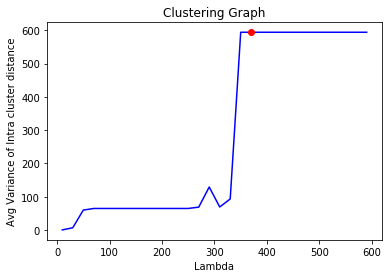

In [28]:
#-------------------------------- Plotting Avg variance vs Lambda ----------------------------------------
plt.title('Clustering Graph')
plt.plot(Lambda_arr, Variance_arr, 'b')
plt.plot(knee_Lambda_Variance, knee_Variance,'ro', label = 'Cluster Count = %f' %knee_Cluster)
plt.xlabel('Lambda')
plt.ylabel('Avg Variance of Intra cluster distance')
plt.show()

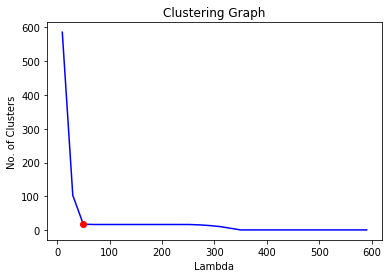

In [29]:
#-------------------------------- Plotting No of Clusters vs Lambda -----------------------------
plt.title('Clustering Graph')
plt.plot(Lambda_arr, Cluster_arr, 'b')
plt.plot(knee_Lambda_Cluster, knee_Cluster,'ro', label = 'Cluster Count = %f' %knee_Cluster)
plt.xlabel('Lambda')
plt.ylabel('No. of Clusters')
plt.show()